<a href="https://colab.research.google.com/github/hyhyzxc/SC1015-Suicide-Rate-Prediction/blob/main/SC1015_Suicide_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table Of Content:

---
1. [Data Importing and Preprocessing](#data_import)
2. [Data Visualisation](#data_explore)
3. [Data Cleaning/ Post Processing](#data_clean)
4. [Machine Learning](#ML)
>1. [Linear Regression](#linear_regression)
>2. [Regression Tree](#regression_tree)
>>1. [Random Forest](#random_forest)
>>2. [Gradient Boosted Regression Tree](#gradient_boost)









In [ ]:
import sys
print(sys.modules.keys())

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'warnings', 're', 'enum', 'types', '_collections', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'functools', '_functools', 'collections', '_collections_abc', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', 'copyreg', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'google', 'google.cloud', 'google.logging', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'runpy', 'pkgutil', 'weakref', '_weakrefset', 'ipykernel', 'ipykernel._version', 'ipykernel

## Data Importing and Preprocessing <a name="data_import"></a>


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import os
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
BASE_DIR = "/content/gdrive/My Drive/SC1015 Project File"

In [ ]:
suicide_rates_path = os.path.join(BASE_DIR, "suicide_rates.csv")

In [ ]:
suicide_rates = pd.read_csv(suicide_rates_path)
suicide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
suicide_rates.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
#Renaming the columns names for convenience

suicide_rates.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
suicide_rates.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
#Listing countries

country = suicide_rates.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

## Data Exploration <a name="data_explore"></a>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37397d1390>,
      dtype=object)

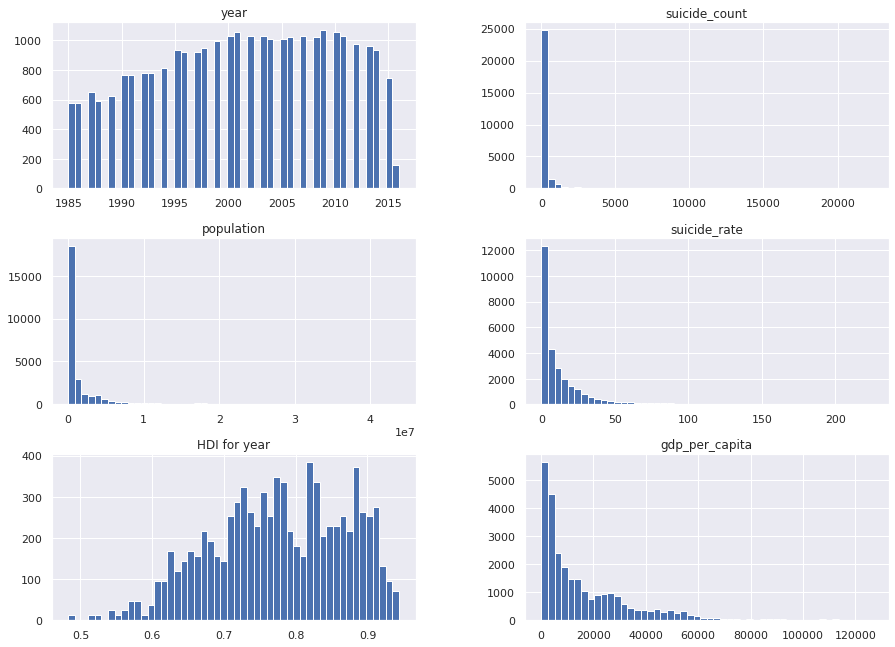

In [ ]:
suicide_rates.hist(bins = 50,figsize = (15,11))

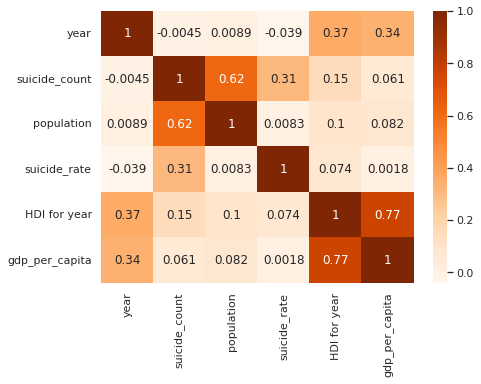

In [ ]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sb.heatmap(suicide_rates.corr(), annot=True, cmap='Oranges')
plt.show()

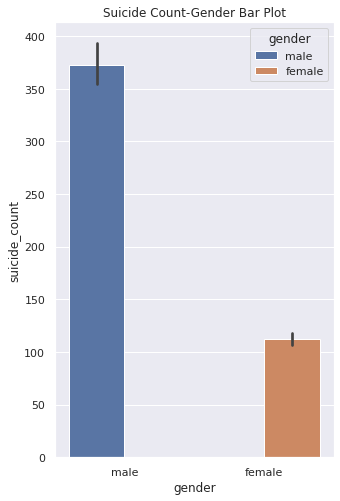

In [ ]:
#Gender and suicide count bar plot

plt.figure(figsize=(5,8))
sb.barplot(x = "gender", y = "suicide_count", hue = "gender", data = suicide_rates)
plt.title('Suicide Count-Gender Bar Plot')
plt.show()

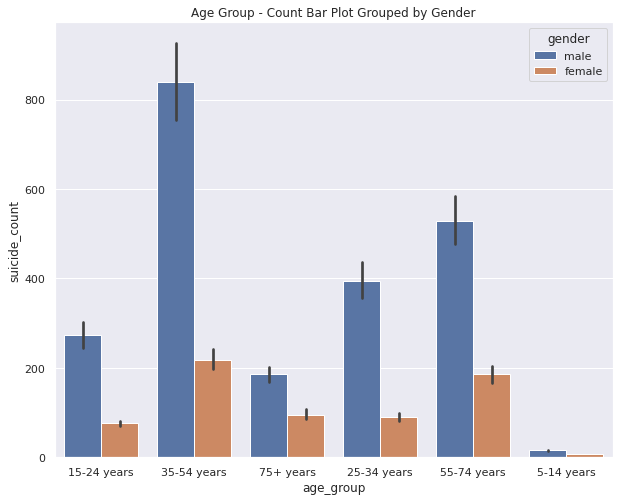

In [ ]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,8))
sb.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = suicide_rates)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

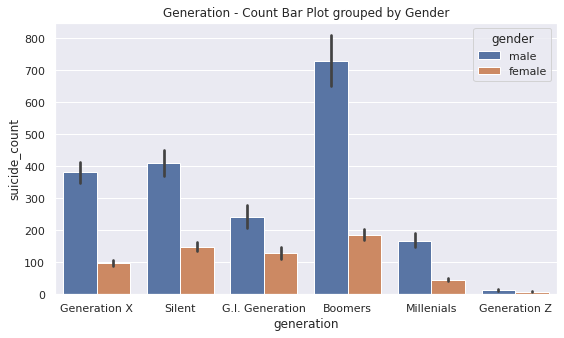

In [ ]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sb.barplot(x = "generation", y = "suicide_count", hue = "gender", data = suicide_rates)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

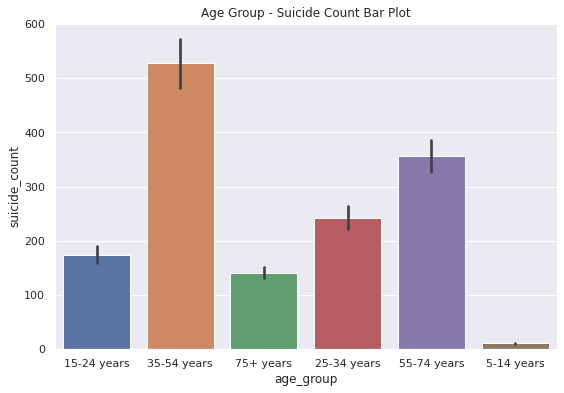

In [ ]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,6))
sb.barplot(x='age_group', y='suicide_count', data = suicide_rates)
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

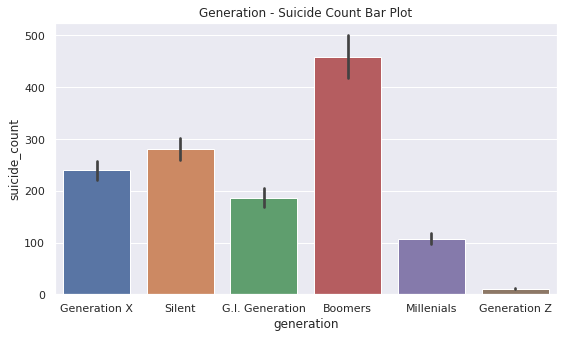

In [ ]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sb.barplot(x='generation', y='suicide_count',data=suicide_rates)
plt.title('Generation - Suicide Count Bar Plot')
plt.show()

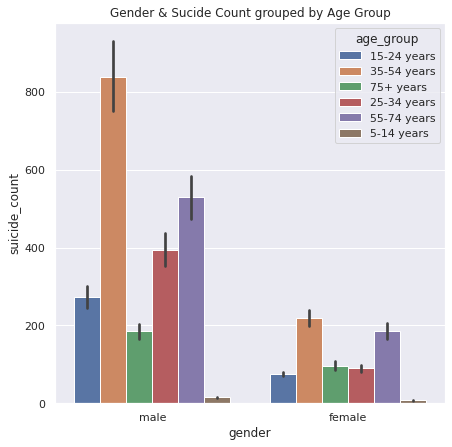

In [ ]:
#Gender & Suicide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sb.barplot(x="gender", y="suicide_count", hue="age_group", data=suicide_rates)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()

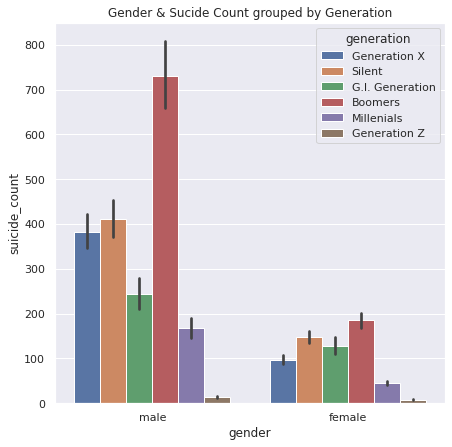

In [ ]:
#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sb.barplot(x="gender", y="suicide_count", hue="generation", data=suicide_rates)
plt.title('Gender & Sucide Count grouped by Generation')
plt.show()

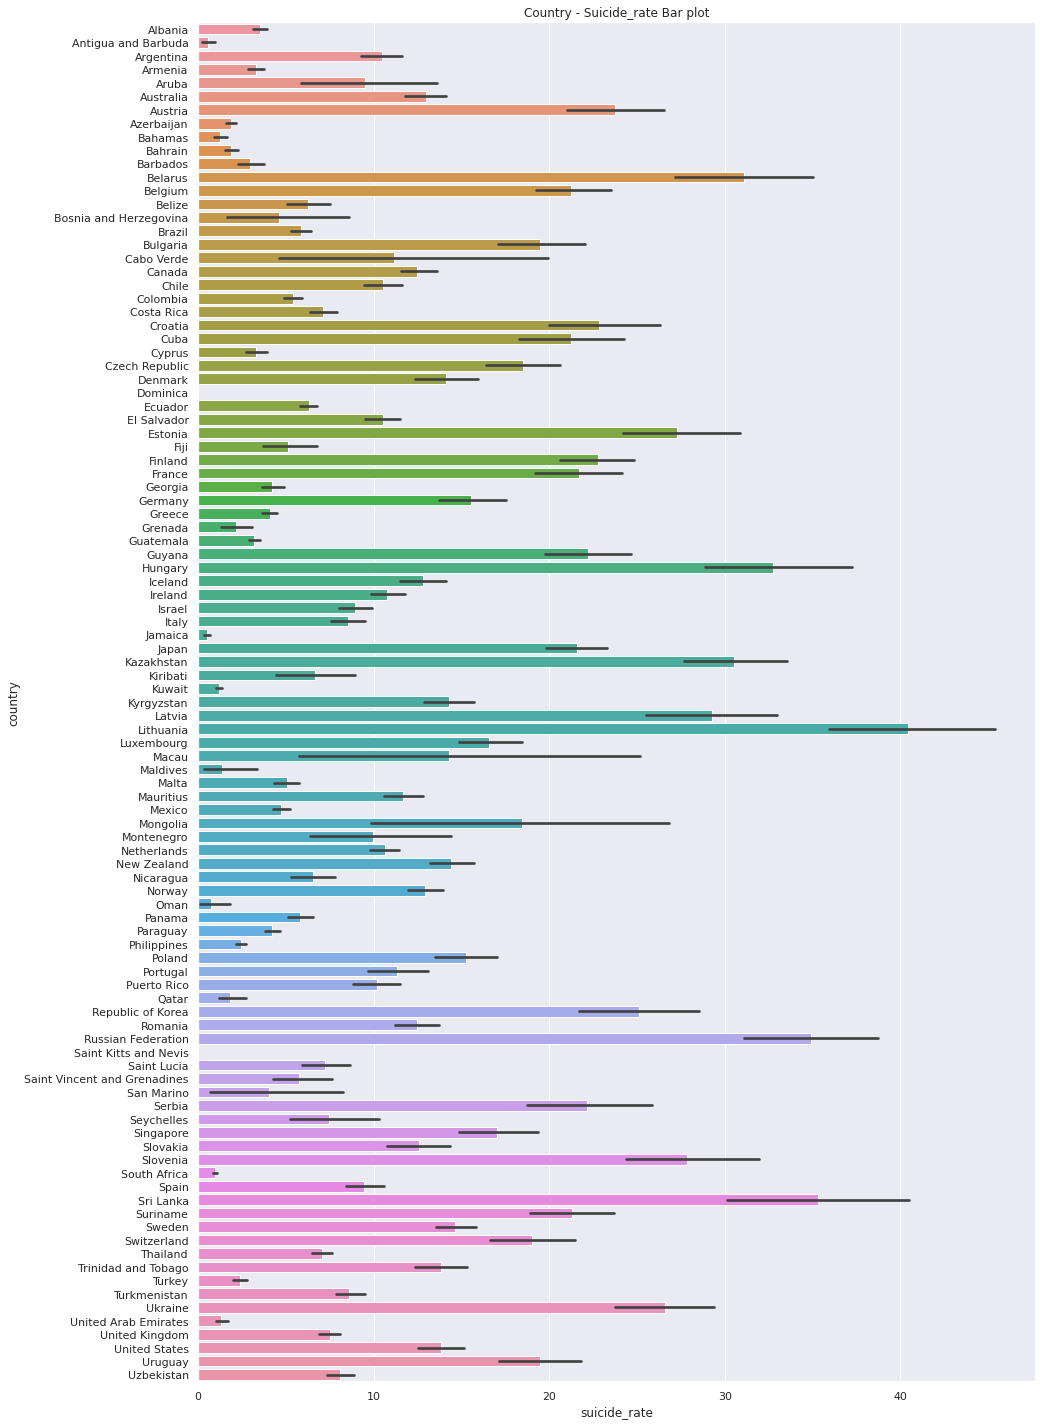

In [ ]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sb.barplot(x = "suicide_rate", y = "country", data = suicide_rates)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

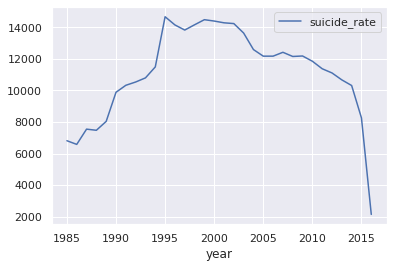

In [ ]:
#Line plpot of year and suicide_rate

suicide_rates[['year','suicide_rate']].groupby(['year']).sum().plot()

<Figure size 1440x720 with 0 Axes>

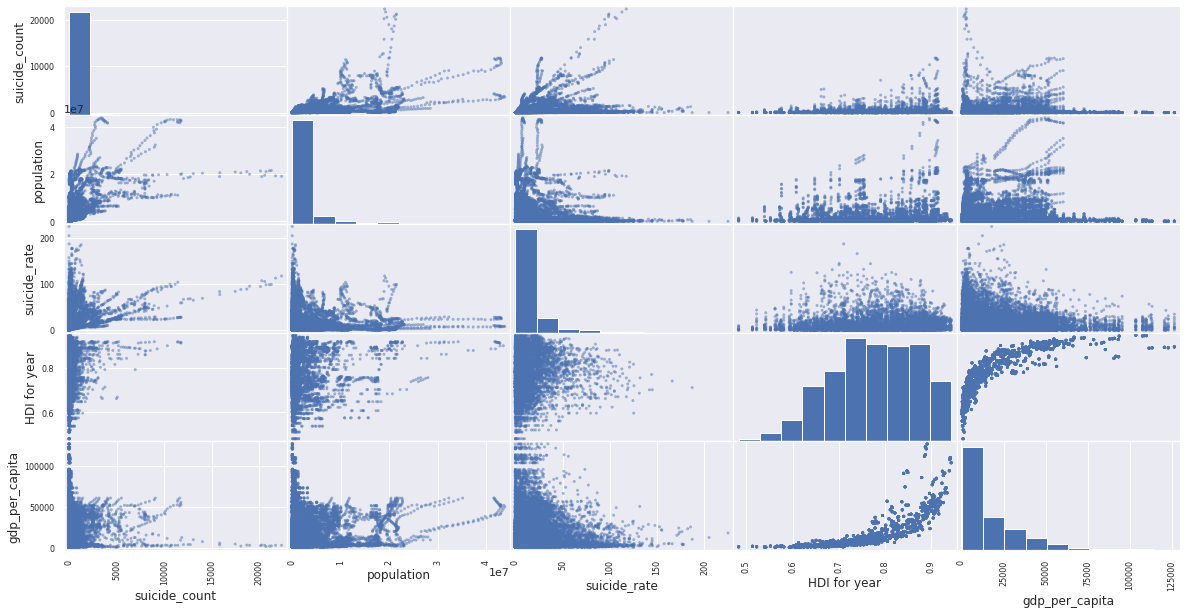

In [ ]:
#Scatter matrix for checking outlier
from pandas.plotting import scatter_matrix

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicide_rate','HDI for year', 
              'gdp_for_year','gdp_per_capita']
scatter_matrix(suicide_rates[attributes], figsize=(20,10))
plt.show()

## Data Cleaning / Post - Processing <a name="data_clean"></a>

In [ ]:
suicide_rates.nunique()

country             101
year                 32
gender                2
age_group             6
suicide_count      2084
population        25564
suicide_rate       5298
country-year       2321
HDI for year        305
gdp_for_year       2321
gdp_per_capita     2233
generation            6
dtype: int64

In [ ]:
suicide_rates.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [ ]:
#dropping the HDI for year column

suicide_rates = suicide_rates.drop(['HDI for year'], axis = 1)
suicide_rates.shape

(27820, 11)

In [ ]:
suicide_rates.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [ ]:
#dropping the country-year for year column

suicide_rates = suicide_rates.drop(['country-year'], axis = 1)
suicide_rates.shape

(27820, 10)

In [ ]:
#droppinf off any null rows (if any)

suicide_rates = suicide_rates.dropna()
suicide_rates.shape

(27820, 10)

In [ ]:
#checking for outlier and removing it
data = suicide_rates
data=data.sort_values(by=["suicide_rate"])
q1=data["suicide_rate"].quantile(0.25)
q3=data["suicide_rate"].quantile(0.75)
iqr=q3-q1
lwo=q1-1.5*iqr
upo=q3+1.5*iqr
data=data[(data.suicide_rate<upo)&(data.suicide_rate>lwo)]
data=data.sort_index().reset_index(drop=True)
data.shape
data.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25774 entries, 0 to 25773
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         25774 non-null  object 
 1   year            25774 non-null  int64  
 2   gender          25774 non-null  object 
 3   age_group       25774 non-null  object 
 4   suicide_count   25774 non-null  int64  
 5   population      25774 non-null  int64  
 6   suicide_rate    25774 non-null  float64
 7   gdp_for_year    25774 non-null  object 
 8   gdp_per_capita  25774 non-null  int64  
 9   generation      25774 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.0+ MB


In [ ]:
#Need to now convert categorical variables to numeric
categorical_cols = ['country', 'year', 'age_group', 'gender', 'generation']
for category in categorical_cols:
  data[category] = data[category].astype('category')
  data[category] = data[category].cat.codes
data.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0


In [ ]:
#Convert gdp_for_year to float
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype('float')


In [ ]:
data.dtypes

country              int8
year                 int8
gender               int8
age_group            int8
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year      float64
gdp_per_capita      int64
generation           int8
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
country,25774.0,4.900237e+01,2.949350e+01,0.0,2.300000e+01,4.700000e+01,7.400000e+01,1.000000e+02
year,25774.0,1.630973e+01,8.505488e+00,0.0,1.000000e+01,1.700000e+01,2.400000e+01,3.100000e+01
gender,25774.0,4.630636e-01,4.986435e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
age_group,25774.0,2.408318e+00,1.682575e+00,0.0,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00
suicide_count,25774.0,1.777423e+02,5.933664e+02,0.0,2.000000e+00,2.000000e+01,1.050000e+02,1.176700e+04
population,25774.0,1.854543e+06,3.934928e+06,278.0,9.704875e+04,4.411165e+05,1.507493e+06,4.380521e+07
suicide_rate,25774.0,8.547500e+00,9.613651e+00,0.0,7.100000e-01,4.990000e+00,1.328000e+01,4.016000e+01
gdp_for_year,25774.0,4.475355e+11,1.477638e+12,46919625.0,8.680472e+09,4.811469e+10,2.620076e+11,1.812071e+13
gdp_per_capita,25774.0,1.710801e+04,1.914534e+04,251.0,3.492000e+03,9.456000e+03,2.519100e+04,1.263520e+05
generation,25774.0,2.705207e+00,1.787342e+00,0.0,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00


## Machine Learning <a name="ML"></a>

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split


y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)
X.shape, y.shape


((25774, 9), (25774,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((20619, 9), (5155, 9))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

### Linear Regression <a name="linear_regression"></a>

In [ ]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.283
Linear Regression: Accuracy on test Data: 0.278

Linear Regression: The RMSE of the training set is: 8.119843795945037
Linear Regression: The RMSE of the testing set is: 8.24165739689076


In [ ]:
#Dont uncomment this yall, if you rerun it there will be duplicates
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Text(0.5, 1.0, 'Actual vs Predicted Training Set')

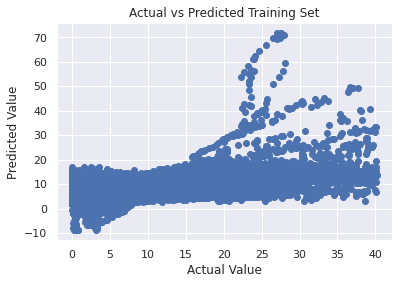

In [ ]:
plt.scatter(y_train,y_train_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Training Set")

Text(0.5, 1.0, 'Actual vs Predicted Testing Set')

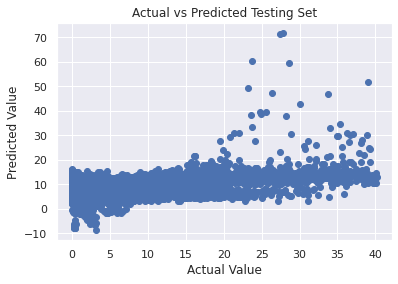

In [ ]:
plt.scatter(y_test,y_test_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Testing Set")

### Regression Tree <a name="regression_tree"></a>

In [ ]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
dectree = DecisionTreeRegressor(max_depth=9)
# fit the model 
dectree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

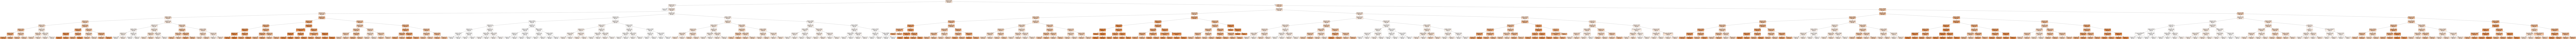

In [ ]:
from sklearn import tree
import graphviz
feature_names = [key for key in X_train]
dot_data = tree.export_graphviz(dectree, out_file='tree.dot', 
                                feature_names=feature_names,  
                                filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = dectree.predict(X_test)
y_train_tree = dectree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = dectree.score(X_train, y_train)
acc_test_tree = dectree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.974
Decision Tree: Accuracy on test Data: 0.966

Decision Tree: The RMSE of the training set is: 1.5532767468992712
Decision Tree: The RMSE of the testing set is: 1.7960720630502147


In [ ]:
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)


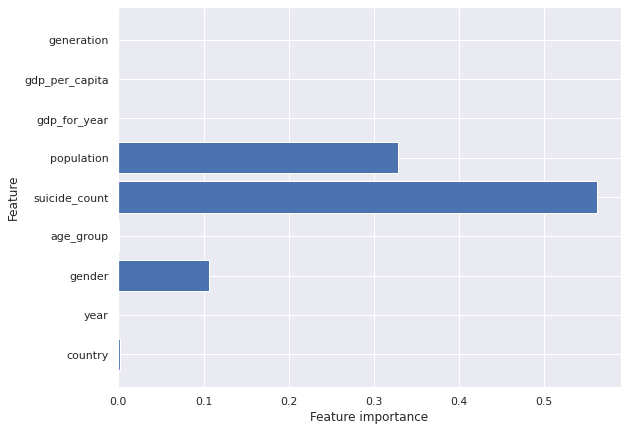

In [ ]:
#checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), dectree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

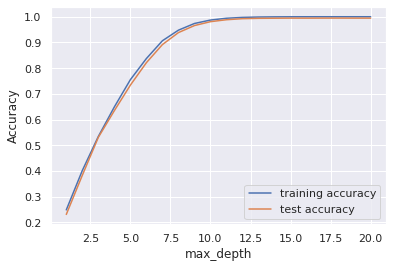

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### Random Forest <a name="random_forest"></a>

In [ ]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.992
Random Forest: Accuracy on test Data: 0.989

Random Forest: The RMSE of the training set is:  0.8774144941283661
Random Forest: The RMSE of the testing set is:  1.0354508023379518


In [ ]:
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

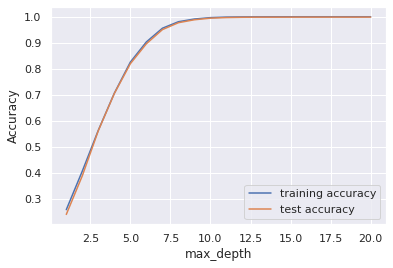

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### Gradient Boosting Regression Tree <a name="gradient_boost"></a>

In [ ]:
# Gradient Boosted Regression Trees model
from sklearn.ensemble import GradientBoostingRegressor

# instantiate the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

# fit the model 
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [ ]:
#predicting the target value from the model for the samples
y_test_gbrt = gbrt.predict(X_test)
y_train_gbrt = gbrt.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_gbrt = gbrt.score(X_train, y_train)
acc_test_gbrt = gbrt.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, y_train_gbrt))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, y_test_gbrt))

print("Gradient Boosted Regression Trees: Accuracy on training Data: {:.3f}".format(acc_train_gbrt))
print("Gradient Boosted Regression Trees: Accuracy on test Data: {:.3f}".format(acc_test_gbrt))
print('\nGradient Boosted Regression Trees: The RMSE of the training set is: ', rmse_train_gbrt)
print('Gradient Boosted Regression Trees: The RMSE of the testing set is: ', rmse_test_gbrt)

Gradient Boosted Regression Trees: Accuracy on training Data: 0.991
Gradient Boosted Regression Trees: Accuracy on test Data: 0.988

Gradient Boosted Regression Trees: The RMSE of the training set is:  0.9174181098660008
Gradient Boosted Regression Trees: The RMSE of the testing set is:  1.044731240011914


In [ ]:
storeResults('Gradient Boosted Regression',acc_train_gbrt, acc_test_gbrt, rmse_train_gbrt, rmse_test_gbrt)

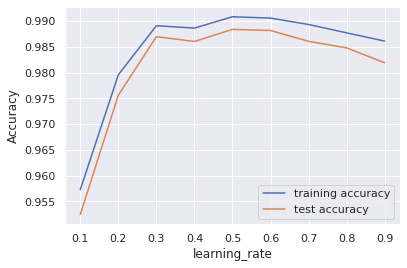

In [ ]:
training_accuracy = []
test_accuracy = []
r = []
# try learning_rate from 0.1 to 0.9
rate = range(1, 10)
for n in rate:
  # fit the model
  gbrt = GradientBoostingRegressor(learning_rate=n*0.1)
  gbrt.fit(X_train, y_train)
  r.append(n*0.1)
  # record training set accuracy
  training_accuracy.append(gbrt.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(gbrt.score(X_test, y_test))

#plotting the training & testing accuracy for learning_rate from 0.1 to 0.9
plt.plot(r, training_accuracy, label="training accuracy")
plt.plot(r, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [ ]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Linear Regression,0.283,0.278,8.120,8.242
1,Decision Tree,0.974,0.966,1.553,1.796
2,Random Forest,0.992,0.989,0.877,1.035
3,Gradient Boosted Regression,0.991,0.988,0.917,1.045
